## Exercise 1

### Introduction

### Data cleaning

In [64]:
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
survey = pd.read_csv("survey.csv")
steps = pd.read_csv("steps.csv" , sep = ";")

#Function to remove outliers
def normal_steps(x):
    if x < 500 or x > 50000:
        return float("NaN")
    else: return x 
    
#Function to remove outliers
def normal_weight(x):
    if x < 40 or x > 150: 
        return float("NaN")
    else: 
        return x

#Clean weight
survey["weight"] = survey["weight"].apply(normal_weight)

#Create mean steps category and clean it up
survey["steps"] = steps[0:].mean(axis = 1)
survey["steps"] = survey["steps"].apply(normal_steps)

#Remove NaN
survey.dropna(inplace = True)

#Turn gender into categorical variable
dummies = pd.get_dummies(survey["gender"])
survey = pd.concat([survey,dummies], axis = 1)


survey.head()






,id,city,gender,age,hh_size,education,education_1,height,weight,steps,Female,Male
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,10144.048193,0,1
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,5652.756098,0,1
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,8246.033557,0,1
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,3460.380952,0,1
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,5215.636364,1,0


### Exploratory data analysis

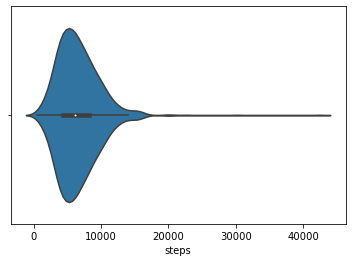

Figure 1: Violin plot of mean steps per person


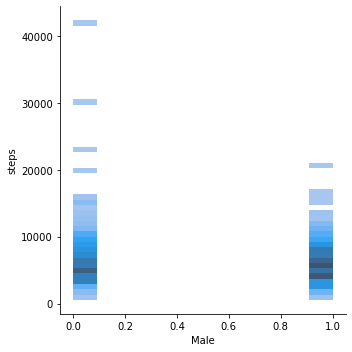

Figure2: Comparing steps between female(left) and male(right)


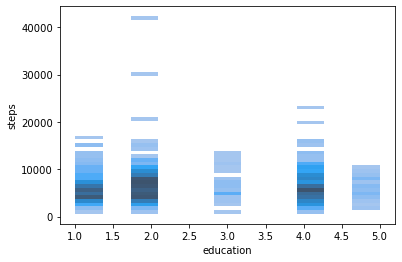

Figure 3: Comparing steps between different levels of education


In [76]:
#Visualize mean steps per person
sns.violinplot(data = survey, x = "steps")
plt.show()

#show relation between gender and steps
print("Figure 1: Violin plot of mean steps per person")
sns.displot(data = survey, x = "Male", y = "steps")
plt.show()

#show relation between education and steps
print("Figure2: Comparing steps between female(left) and male(right)")
sns.histplot(data = survey, x = "education", y = "steps")
plt.show()
print("Figure 3: Comparing steps between different levels of education")



,id,hh_size,education,height,weight,steps,Female,Male
id,1.000000,-0.012982,-0.002147,0.024564,-0.002786,0.040796,-0.042034,0.042034
hh_size,-0.012982,1.000000,0.825109,-0.045322,0.010853,0.030208,0.014801,-0.014801
education,-0.002147,0.825109,1.000000,-0.028263,0.010172,0.005253,-0.003109,0.003109
height,0.024564,-0.045322,-0.028263,1.000000,0.520206,-0.075436,-0.710012,0.710012
weight,-0.002786,0.010853,0.010172,0.520206,1.000000,-0.065825,-0.436176,0.436176
steps,0.040796,0.030208,0.005253,-0.075436,-0.065825,1.000000,0.074412,-0.074412
Female,-0.042034,0.014801,-0.003109,-0.710012,-0.436176,0.074412,1.000000,-1.000000
Male,0.042034,-0.014801,0.003109,0.710012,0.436176,-0.074412,-1.000000,1.000000


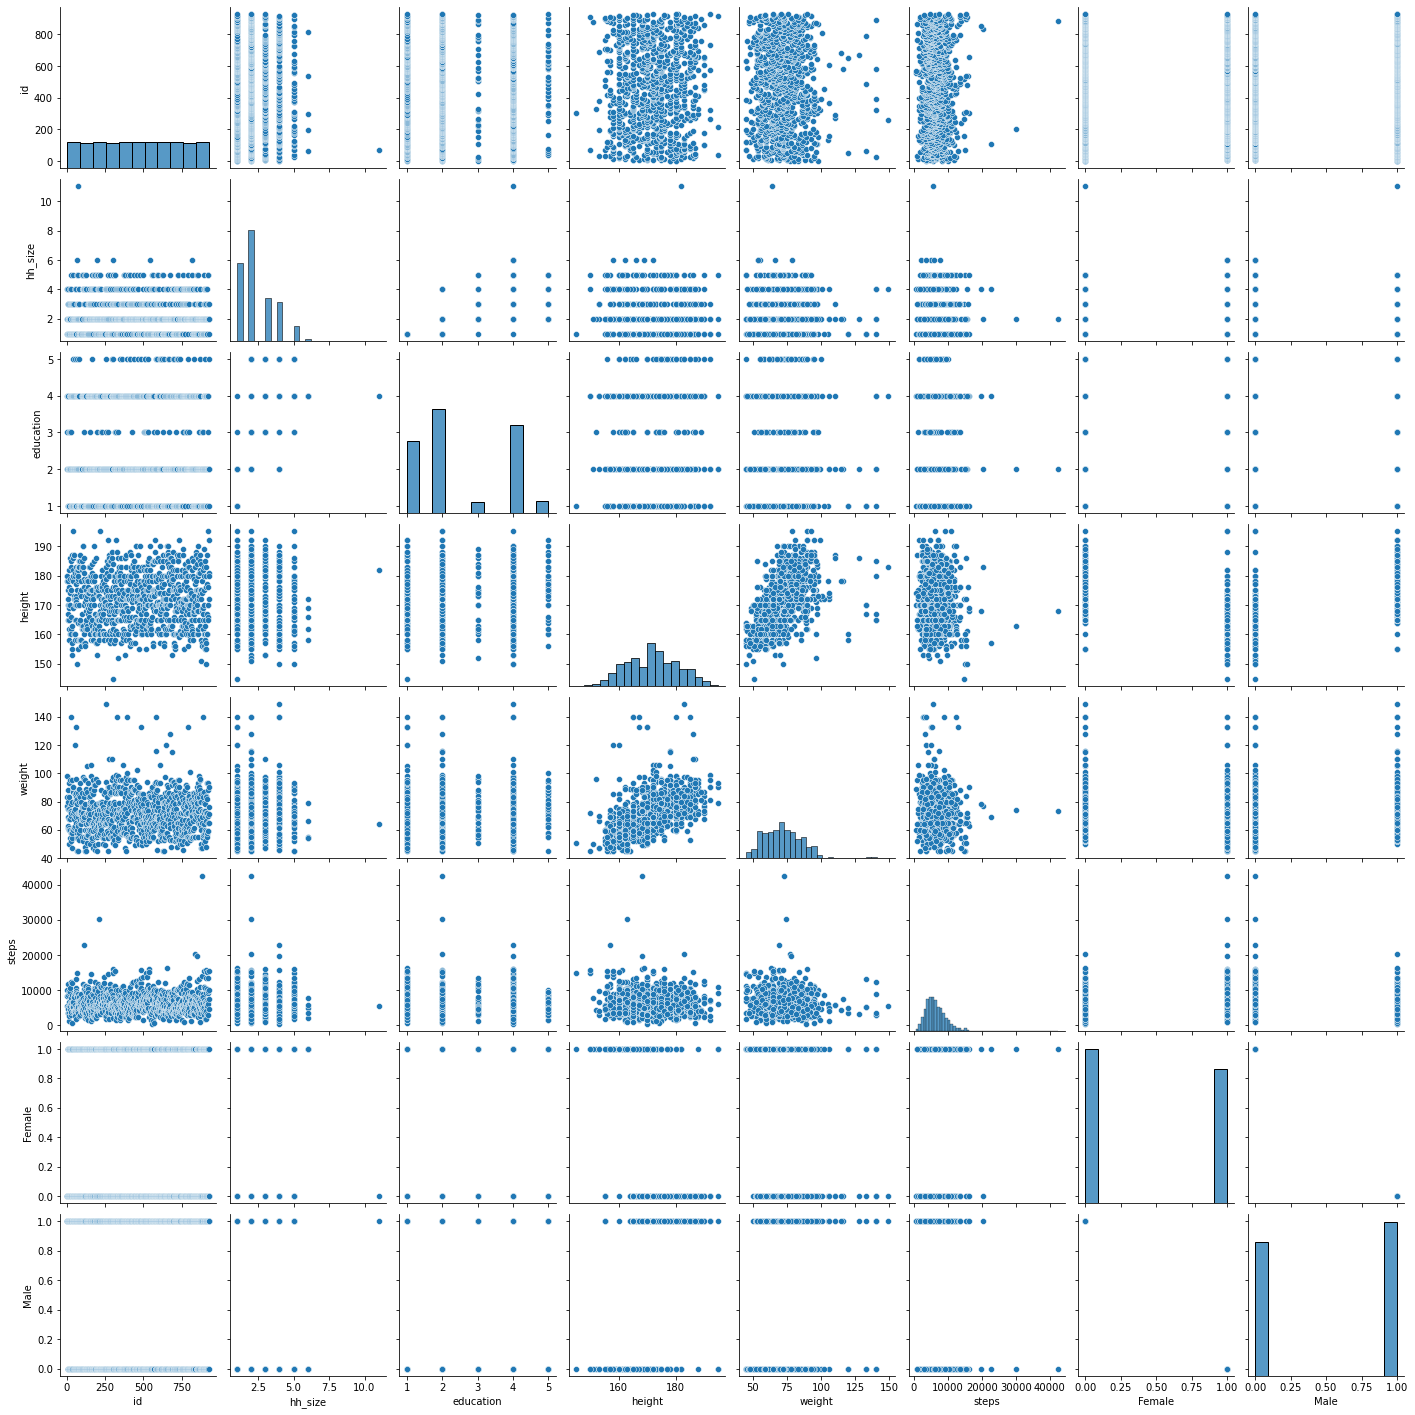

In [77]:
#Make scatterplots for the relations and calculate correlation
sns.pairplot(survey)
survey.corr()

Describe and interpret the results

### Predictive model

In [78]:
from sklearn.linear_model import LinearRegression
x = survey[["weight","height","Female","education"]]
y = survey["steps"]
lm = LinearRegression()
lm = lm.fit(x,y)

### Evaluation

In [81]:
#run the model
survey["steps_p"] = lm.predict(x) 
survey.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,steps,Female,Male,steps_p
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,10144.048193,0,1,6215.532266
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,5652.756098,0,1,6344.988711
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,8246.033557,0,1,6301.427095
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,3460.380952,0,1,6346.217114
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,5215.636364,1,0,6858.527011


In [82]:
from sklearn.metrics import r2_score

#Evaluate r2 
r2_score(survey["steps"], survey["steps_p"])

0.007351948700096811

In [84]:
from sklearn.metrics import mean_squared_error 
from math import sqrt 

#Evaluate RMSE
sqrt(mean_squared_error(survey["steps"], survey["steps_p"]))

3275.0313218367614

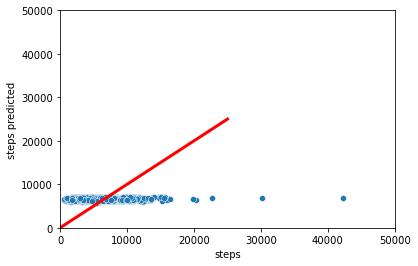

In [87]:
# Evalutate Y-Y
sns.scatterplot(x="steps",y="steps_p",data = survey)
plt.xlim(0, 50000) 
plt.ylim(0, 50000) 
plt.plot([0, 25000], [0, 25000], color='red', lw=3) 
plt.xlabel("steps")
plt.ylabel("steps predicted")
plt.show()

### Conclusion

The model is very poor. There's no real correlation and the abysmall r2 of 0.007 reflects this. No matter the inputs the final outcome is always relatively the same (between 6-7k steps). 